 Build three machine learning models to predict G3 in the dataset -  https://archive.ics.uci.edu/ml/datasets/Student+Performance. Drop columns G1 and G2. Find out the best performing model, and justify your answer.

# import Libraries

In [85]:
import numpy as np
import pandas as pd

In [127]:
df=pd.read_csv('student-mat.csv')

In [128]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [129]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


# remove G1 and G2 consider only G3 as target

In [130]:
df.drop(["G1","G2"], axis= 1, inplace= True)

In [131]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


# check information of the data set

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [133]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

there are no null values

In [134]:
for  col in df.columns:
    print('{}: {} unique values'.format(col,df[col].nunique()))

school: 2 unique values
sex: 2 unique values
age: 8 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Medu: 5 unique values
Fedu: 5 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
traveltime: 4 unique values
studytime: 4 unique values
failures: 4 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values
famrel: 5 unique values
freetime: 5 unique values
goout: 5 unique values
Dalc: 5 unique values
Walc: 5 unique values
health: 5 unique values
absences: 34 unique values
G3: 18 unique values


In [135]:
df["G3"].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

# Analyse the data

In [136]:
df.groupby('school').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
school,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.489971
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,9.847826


In [137]:
df.groupby('age').mean()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,,,,,,,,,,,,,
15,3.036585,2.756098,1.365854,2.158537,0.268293,4.000000,3.280488,2.743902,1.353659,1.902439,3.585366,3.341463,11.256098
16,2.826923,2.576923,1.403846,1.875000,0.230769,3.836538,3.230769,3.173077,1.432692,2.278846,3.701923,5.451923,11.028846
17,2.612245,2.469388,1.459184,2.020408,0.244898,3.908163,3.224490,3.204082,1.520408,2.571429,3.500000,6.459184,10.275510
18,2.707317,2.475610,1.585366,2.146341,0.292683,4.024390,3.121951,3.304878,1.548780,2.414634,3.439024,6.048780,9.548780
19,2.166667,2.041667,1.458333,2.083333,1.166667,3.875000,3.250000,2.916667,1.458333,1.958333,3.500000,10.458333,8.208333
20,3.000000,2.000000,1.333333,2.000000,1.333333,5.000000,4.666667,3.333333,2.000000,2.333333,4.000000,5.000000,14.000000
21,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000
22,3.000000,1.000000,1.000000,1.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,16.000000,8.000000


In [138]:
df.groupby('studytime').mean()

,age,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
studytime,,,,,,,,,,,,,
1,16.647619,2.657143,2.438095,1.590476,0.523810,3.876190,3.438095,3.142857,1.761905,2.761905,3.800000,5.761905,10.047619
2,16.702020,2.737374,2.570707,1.414141,0.308081,3.934343,3.217172,3.176768,1.449495,2.267677,3.419192,6.277778,10.171717
3,16.923077,2.907692,2.676923,1.323077,0.230769,4.153846,3.092308,2.892308,1.200000,1.815385,3.723077,4.538462,11.400000
4,16.296296,2.814815,2.111111,1.444444,0.037037,3.777778,2.925926,3.000000,1.296296,1.777778,3.185185,4.148148,11.259259


In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

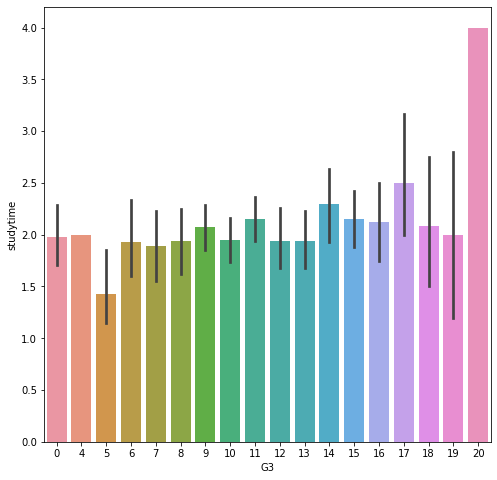

In [140]:
plt.figure(figsize=(8,8))
sns.barplot(y='studytime', x='G3', data=df,  )

students who spend more time to study got highest mark

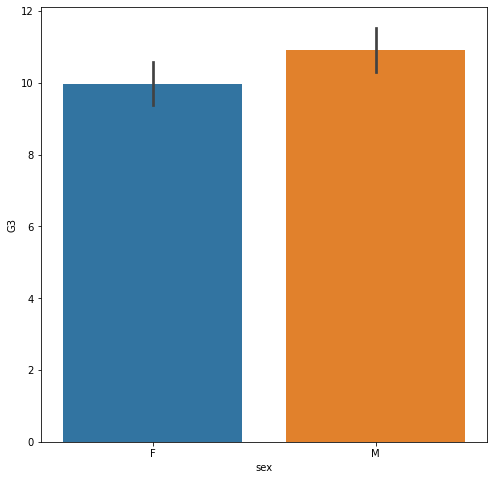

In [141]:
plt.figure(figsize=(8,8))
sns.barplot(x='sex', y='G3', data=df,  )

there is no much variation between male and female in obtaining marks

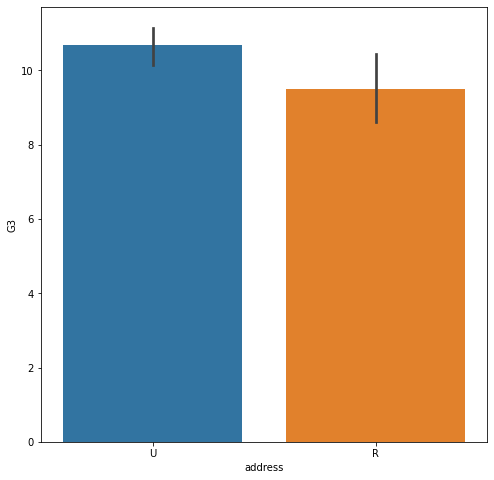

In [142]:
plt.figure(figsize=(8,8))
sns.barplot(x='address', y='G3', data=df,  )

the students in the urben area has high marks then the rural area students

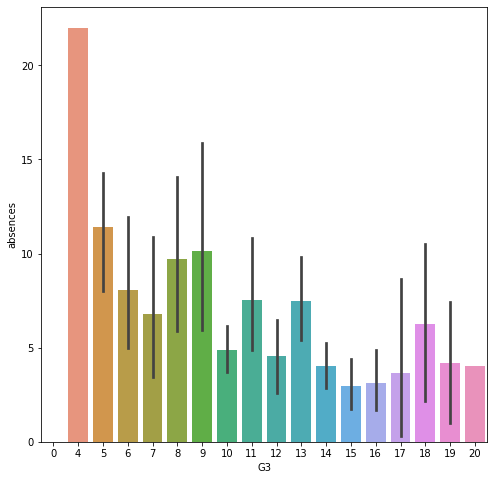

In [143]:
plt.figure(figsize=(8,8))
sns.barplot(x='G3', y='absences', data=df,  )

the students who are regular to class has got high marks then the irrugular students

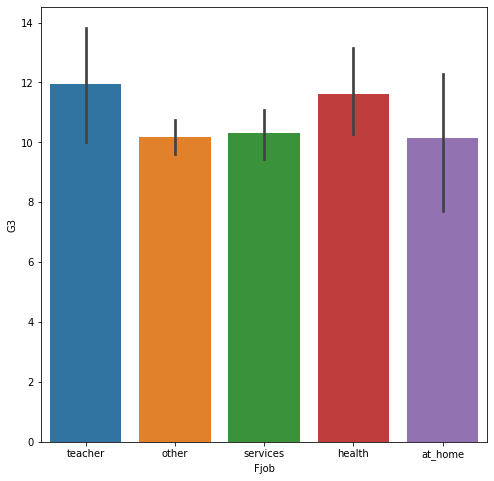

In [144]:
plt.figure(figsize=(8,8))
sns.barplot(x='Fjob', y='G3', data=df,  )

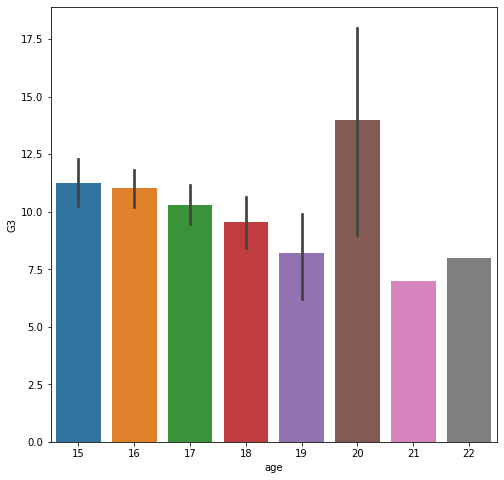

In [145]:
plt.figure(figsize=(8,8))
sns.barplot(x='age', y='G3', data=df,  )

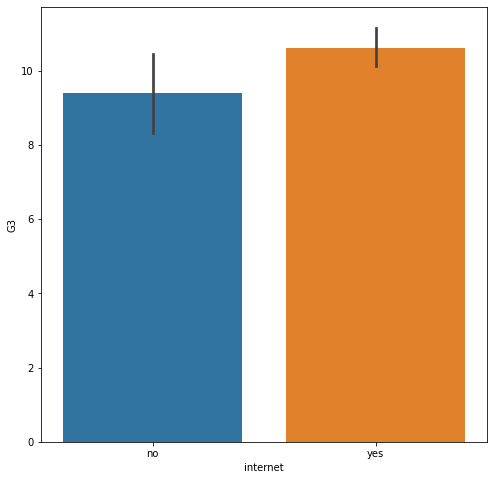

In [146]:
plt.figure(figsize=(8,8))
sns.barplot(x='internet', y='G3', data=df,  )

students who have got internet fecility were bit forward then the students with out internet fecility

# Converting Categorical to numerical data with the use of lebel encoder

In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["school"] = le.fit_transform(df["school"])
df["sex"] = le.fit_transform(df["sex"])
df["address"] = le.fit_transform(df["address"])
df["famsize"] = le.fit_transform(df["famsize"])
df["Pstatus"] = le.fit_transform(df["Pstatus"])
df["Mjob"] = le.fit_transform(df["Mjob"])
df["Fjob"] = le.fit_transform(df["Fjob"])
df["reason"] = le.fit_transform(df["reason"])
df["guardian"] = le.fit_transform(df["guardian"])
df['schoolsup']= le.fit_transform(df['schoolsup'])
df["famsup"] = le.fit_transform(df["famsup"])
df["paid"] = le.fit_transform(df["paid"])
df["activities"] = le.fit_transform(df["activities"])
df["nursery"] = le.fit_transform(df["nursery"])
df["higher"] = le.fit_transform(df["higher"])
df["internet"] = le.fit_transform(df["internet"])
df["romantic"] = le.fit_transform(df["romantic"])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

In [149]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,10


# checking correlation

Text(0.5, 1.0, 'Correlation Heatmap')

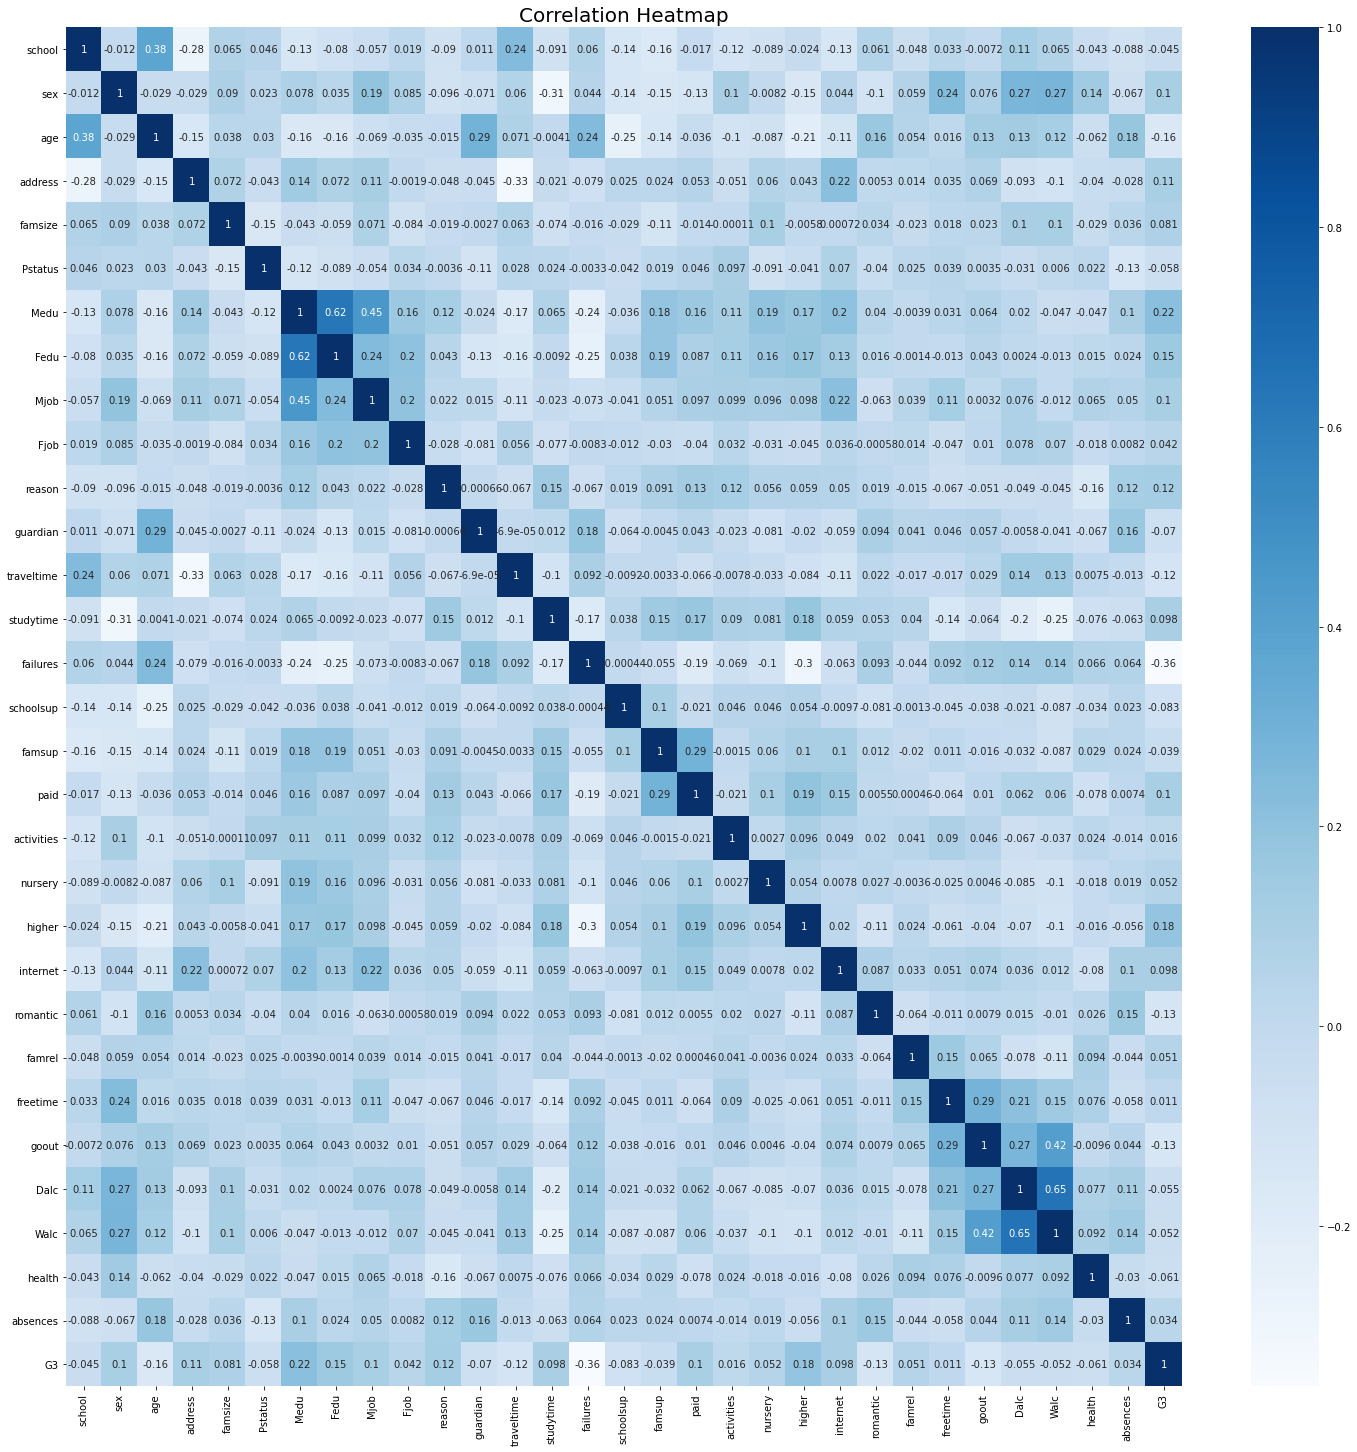

In [150]:
corr_matrix = df.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

there is less correlation between feature and the target so consider all the feature for prediction

In [151]:
for  col in df.columns:
    print('{}: {} unique values'.format(col,df[col].nunique()))

school: 2 unique values
sex: 2 unique values
age: 8 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Medu: 5 unique values
Fedu: 5 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
traveltime: 4 unique values
studytime: 4 unique values
failures: 4 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values
famrel: 5 unique values
freetime: 5 unique values
goout: 5 unique values
Dalc: 5 unique values
Walc: 5 unique values
health: 5 unique values
absences: 34 unique values
G3: 18 unique values


# Due to Multiclass clasification the accurary of the data is not that fair

In [152]:
df['FinalGrade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'FinalGrade'] = 'Excellent'
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'FinalGrade'] = 'Good'  
df.loc[(df.G3 >= 6) & (df.G3 <= 10), 'FinalGrade'] = 'Poor' 
df.loc[(df.G3 >= 0) & (df.G3 <= 5), 'FinalGrade'] = 'Failure' 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,FinalGrade
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,6,Poor
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,6,Poor
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,10,Poor
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,Excellent
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,10,Poor


so reducing the categories can improve the accuracy of the data

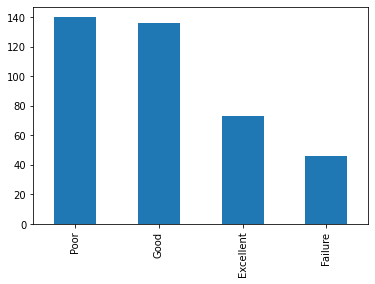

In [153]:
df["FinalGrade"].value_counts().plot(kind = "bar")

In [154]:
df['FinalGrade'] = le.fit_transform(df['FinalGrade'])

In [155]:
X = df.drop(labels=['FinalGrade','G3'],axis=1)
y = df.FinalGrade

In [156]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,4


# preprocess the data

In [157]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

# splitting the data

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

In [159]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(276, 30) (276,) (119, 30) (119,)


# Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=0)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [166]:
logreg_ypredict = logreg_model.predict(X_test)
logreg_ypredict

array([0, 3, 0, 3, 3, 2, 3, 0, 0, 3, 0, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 3,
       2, 1, 2, 2, 3, 2, 3, 0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 0, 2, 3, 2,
       2, 2, 3, 2, 0, 3, 3, 0, 2, 3, 2, 2, 3, 3, 2, 1, 3, 2, 2, 0, 3, 3,
       3, 3, 2, 0, 1, 2, 3, 3, 3, 0, 3, 3, 1, 2, 3, 2, 3, 2, 1, 0, 3, 1,
       0, 3, 3, 3, 2, 0, 1, 1, 0, 3, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 3, 2, 2, 0, 2, 3, 3])

In [167]:
logreg_acc = accuracy_score(logreg_ypredict, y_test)
logreg_acc

0.3865546218487395

# Decisiontree classifier

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=100)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [180]:
dtc_ypredict = dtc_model.predict(X_test)
dtc_ypredict

array([3, 3, 1, 2, 0, 2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 0, 3, 2, 2, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 0, 3, 3, 3, 0, 1, 2,
       1, 3, 2, 3, 0, 0, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 0, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 1, 3, 0, 3, 2, 1, 2, 2, 2, 2, 1, 0, 3, 3,
       2, 2, 3, 2, 3, 2, 1, 3, 3, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 3, 1,
       3, 0, 3, 0, 3, 0, 3, 1, 2])

In [181]:
dtc_acc = accuracy_score(dtc_ypredict, y_test)
dtc_acc

0.40336134453781514

# Random forest classifier

In [182]:
from sklearn.ensemble import RandomForestClassifier
rfcmodel = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=100)
rfcmodel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=100)

In [184]:
Rf_ypredict = rfcmodel.predict(X_test)
Rf_ypredict

array([2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 0, 0, 2, 3, 2, 3, 3, 1, 2,
       3, 3, 3, 2, 0, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 3, 2,
       1, 2, 2, 3, 0, 2, 3, 0, 2, 3, 3, 3, 2, 3, 3, 3, 2, 0, 3, 2, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 3, 1, 2, 1, 3, 3, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 3, 2, 1,
       2, 0, 3, 2, 2, 2, 2, 2, 3])

In [185]:
Rf_acc = accuracy_score(Rf_ypredict, y_test)
Rf_acc

0.5210084033613446

# SVM classifier

In [189]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", verbose=True, probability=True, random_state=100)
svm_model.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, random_state=100, verbose=True)

In [190]:
svm_ypredict = svm_model.predict(X_test)
svm_ypredict

array([0, 3, 2, 3, 3, 2, 3, 0, 0, 3, 0, 3, 3, 3, 0, 2, 3, 3, 3, 2, 1, 3,
       2, 1, 2, 2, 3, 2, 1, 0, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 3, 3, 0, 3, 3, 0, 2, 3, 2, 2, 1, 3, 3, 1, 2, 2, 1, 0, 2, 3,
       3, 3, 2, 0, 1, 0, 3, 3, 3, 0, 3, 2, 1, 2, 3, 2, 3, 2, 1, 0, 3, 1,
       3, 3, 3, 3, 2, 0, 1, 1, 2, 3, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 3, 2])

In [191]:
svc_acc = accuracy_score(svm_ypredict, y_test)
svc_acc

0.3697478991596639

the data set is comprises of categorical feature due to higher number of categorical feature the data set is not trained well and due to less correlation between the feature and the target the accuracy is not good
comparing to above classification model Random forest classifier performed well with more then 50 percent accuracy

by analysing the data the students who spent more time to study and the student with internet fecility and the students in Urban area has got high marks then the other students